In [1]:
import pandas as pd                                     # To work on data manipulation 
import numpy as np                                      # It is used for numerical python
import seaborn as sns                                   # For Visualization
import matplotlib.pyplot as plt                         # For Visualization
from sklearn.model_selection import train_test_split    # To split the data (train and test)
from sklearn.linear_model import SGDRegressor           # To build the model (S.G.D)
from sklearn.preprocessing import StandardScaler        # To convert the predictor to the same scale(To scale down the data where mean =0 and std = 1) 
from sklearn.metrics import mean_squared_error          # To find the MSE (error)   To check the performance of your model 
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
df=pd.read_csv(r"C:\Users\gkish\Downloads\Machine Learning\House Price Prediction.csv")
df

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


In [3]:
df.shape

(13320, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [5]:
df.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


In [6]:
df.dtypes

area_type        object
availability     object
location         object
size             object
society          object
total_sqft       object
bath            float64
balcony         float64
price           float64
dtype: object

In [7]:
df[df.duplicated()]

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
971,Super built-up Area,Ready To Move,Haralur Road,3 BHK,NRowse,1464,3.0,2.0,56.0
1115,Super built-up Area,Ready To Move,Haralur Road,2 BHK,NaN,1027,2.0,2.0,44.0
1143,Super built-up Area,Ready To Move,Vittasandra,2 BHK,Prlla C,1246,2.0,1.0,64.5
1290,Super built-up Area,Ready To Move,Haralur Road,2 BHK,NaN,1194,2.0,2.0,47.0
1394,Super built-up Area,Ready To Move,Haralur Road,2 BHK,NaN,1027,2.0,2.0,44.0
...,...,...,...,...,...,...,...,...,...
13285,Super built-up Area,Ready To Move,VHBCS Layout,2 BHK,OlarkLa,1353,2.0,2.0,110.0
13299,Super built-up Area,18-Dec,Whitefield,4 BHK,Prtates,2830 - 2882,5.0,0.0,154.5
13311,Plot Area,Ready To Move,Ramamurthy Nagar,7 Bedroom,NaN,1500,9.0,2.0,250.0
13313,Super built-up Area,Ready To Move,Uttarahalli,3 BHK,Aklia R,1345,2.0,1.0,57.0


In [8]:
df.drop_duplicates(keep='first',inplace=True)
df

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13314,Super built-up Area,Ready To Move,Green Glen Layout,3 BHK,SoosePr,1715,3.0,3.0,112.00
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00


In [9]:
df.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5328
total_sqft         0
bath              73
balcony          605
price              0
dtype: int64

In [10]:
df.availability.nunique()

81

In [11]:
df.location.nunique()

1305

In [12]:
df.society.nunique()

2688

In [13]:
df.drop(['availability','location','society'],axis=1,inplace=True)
df.head()

,area_type,size,total_sqft,bath,balcony,price
0,Super built-up Area,2 BHK,1056,2.0,1.0,39.07
1,Plot Area,4 Bedroom,2600,5.0,3.0,120.00
2,Built-up Area,3 BHK,1440,2.0,3.0,62.00
3,Super built-up Area,3 BHK,1521,3.0,1.0,95.00
4,Super built-up Area,2 BHK,1200,2.0,1.0,51.00


In [14]:
df.isnull().sum()

area_type       0
size           16
total_sqft      0
bath           73
balcony       605
price           0
dtype: int64

In [15]:
df.shape

(12791, 6)

In [16]:
(605/12791)*100

4.729888202642483

In [17]:
df.total_sqft.nunique()

2117

In [18]:

for i in df.columns:
    print(f'Column Name : {i}','\n')
    print(df[i].unique(),'\n')
    print(f'Number of unique values=',df[i].nunique(),'\n')

Column Name : area_type 

['Super built-up  Area' 'Plot  Area' 'Built-up  Area' 'Carpet  Area'] 

Number of unique values= 4 

Column Name : size 

['2 BHK' '4 Bedroom' '3 BHK' '4 BHK' '6 Bedroom' '3 Bedroom' '1 BHK'
 '1 RK' '1 Bedroom' '8 Bedroom' '2 Bedroom' '7 Bedroom' '5 BHK' '7 BHK'
 '6 BHK' '5 Bedroom' '11 BHK' '9 BHK' nan '9 Bedroom' '27 BHK'
 '10 Bedroom' '11 Bedroom' '10 BHK' '19 BHK' '16 BHK' '43 Bedroom'
 '14 BHK' '8 BHK' '12 Bedroom' '13 BHK' '18 Bedroom'] 

Number of unique values= 31 

Column Name : total_sqft 

['1056' '2600' '1440' ... '1133 - 1384' '774' '4689'] 

Number of unique values= 2117 

Column Name : bath 

[ 2.  5.  3.  4.  6.  1.  9. nan  8.  7. 11. 10. 14. 27. 12. 16. 40. 15.
 13. 18.] 

Number of unique values= 19 

Column Name : balcony 

[ 1.  3. nan  2.  0.] 

Number of unique values= 4 

Column Name : price 

[ 39.07 120.    62.   ...  40.14 231.   488.  ] 

Number of unique values= 1994 



In [19]:
df['balcony'].fillna(df['balcony'].mode().iloc[0], inplace=True)

In [20]:
df.balcony.mode()

0    2.0
Name: balcony, dtype: float64

In [21]:
df.balcony.describe()

count    12791.000000
mean         1.602064
std          0.807728
min          0.000000
25%          1.000000
50%          2.000000
75%          2.000000
max          3.000000
Name: balcony, dtype: float64

In [22]:
pd.set_option('display.max_rows', 20)
pd.set_option('display.max_columns', 20)

In [23]:
print(df.total_sqft)

0        1056
1        2600
2        1440
3        1521
4        1200
         ... 
13314    1715
13315    3453
13316    3600
13317    1141
13318    4689
Name: total_sqft, Length: 12791, dtype: object


In [24]:
df.total_sqft.nunique()

2117

In [25]:
df['t2']=pd.to_numeric(df.total_sqft,errors='coerce')
df

,area_type,size,total_sqft,bath,balcony,price,t2
0,Super built-up Area,2 BHK,1056,2.0,1.0,39.07,1056.0
1,Plot Area,4 Bedroom,2600,5.0,3.0,120.00,2600.0
2,Built-up Area,3 BHK,1440,2.0,3.0,62.00,1440.0
3,Super built-up Area,3 BHK,1521,3.0,1.0,95.00,1521.0
4,Super built-up Area,2 BHK,1200,2.0,1.0,51.00,1200.0
...,...,...,...,...,...,...,...
13314,Super built-up Area,3 BHK,1715,3.0,3.0,112.00,1715.0
13315,Built-up Area,5 Bedroom,3453,4.0,0.0,231.00,3453.0
13316,Super built-up Area,4 BHK,3600,5.0,2.0,400.00,3600.0
13317,Built-up Area,2 BHK,1141,2.0,1.0,60.00,1141.0


In [26]:
df.isnull().sum()

area_type       0
size           16
total_sqft      0
bath           73
balcony         0
price           0
t2            246
dtype: int64

In [27]:
df.dropna(subset=['t2'],inplace=True)

In [28]:
df.isnull().sum()

area_type      0
size           8
total_sqft     0
bath          16
balcony        0
price          0
t2             0
dtype: int64

In [29]:
df1=df.copy(deep=True)
df1.head()

,area_type,size,total_sqft,bath,balcony,price,t2
0,Super built-up Area,2 BHK,1056,2.0,1.0,39.07,1056.0
1,Plot Area,4 Bedroom,2600,5.0,3.0,120.00,2600.0
2,Built-up Area,3 BHK,1440,2.0,3.0,62.00,1440.0
3,Super built-up Area,3 BHK,1521,3.0,1.0,95.00,1521.0
4,Super built-up Area,2 BHK,1200,2.0,1.0,51.00,1200.0


In [30]:
df.drop('total_sqft',axis=1,inplace=True)

In [31]:
average_balcony_by_sqft = df.groupby('t2')['balcony'].mean().round()
df['balcony'] = df.apply(lambda row: average_balcony_by_sqft[row['t2']] if pd.isnull(row['balcony']) else row['balcony'], axis=1)


In [32]:
df.isnull().sum()

area_type     0
size          8
bath         16
balcony       0
price         0
t2            0
dtype: int64

In [33]:
df.balcony.unique()

array([1., 3., 2., 0.])

In [34]:
df['balcony'] = df.apply(lambda row: average_balcony_by_sqft[row['t2']] if pd.isnull(row['balcony']=='nan') else row['balcony'], axis=1)

In [35]:
df.isnull().sum()

area_type     0
size          8
bath         16
balcony       0
price         0
t2            0
dtype: int64

In [36]:
df.dropna(subset=['balcony'],inplace=True)

In [37]:
df.dropna(inplace=True)

In [38]:
df.isnull().sum()

area_type    0
size         0
bath         0
balcony      0
price        0
t2           0
dtype: int64

In [39]:
df

,area_type,size,bath,balcony,price,t2
0,Super built-up Area,2 BHK,2.0,1.0,39.07,1056.0
1,Plot Area,4 Bedroom,5.0,3.0,120.00,2600.0
2,Built-up Area,3 BHK,2.0,3.0,62.00,1440.0
3,Super built-up Area,3 BHK,3.0,1.0,95.00,1521.0
4,Super built-up Area,2 BHK,2.0,1.0,51.00,1200.0
...,...,...,...,...,...,...
13314,Super built-up Area,3 BHK,3.0,3.0,112.00,1715.0
13315,Built-up Area,5 Bedroom,4.0,0.0,231.00,3453.0
13316,Super built-up Area,4 BHK,5.0,2.0,400.00,3600.0
13317,Built-up Area,2 BHK,2.0,1.0,60.00,1141.0


In [40]:
df['NumericRooms'] = df['size'].str.extract('(\d+)')
df

,area_type,size,bath,balcony,price,t2,NumericRooms
0,Super built-up Area,2 BHK,2.0,1.0,39.07,1056.0,2
1,Plot Area,4 Bedroom,5.0,3.0,120.00,2600.0,4
2,Built-up Area,3 BHK,2.0,3.0,62.00,1440.0,3
3,Super built-up Area,3 BHK,3.0,1.0,95.00,1521.0,3
4,Super built-up Area,2 BHK,2.0,1.0,51.00,1200.0,2
...,...,...,...,...,...,...,...
13314,Super built-up Area,3 BHK,3.0,3.0,112.00,1715.0,3
13315,Built-up Area,5 Bedroom,4.0,0.0,231.00,3453.0,5
13316,Super built-up Area,4 BHK,5.0,2.0,400.00,3600.0,4
13317,Built-up Area,2 BHK,2.0,1.0,60.00,1141.0,2


In [41]:
df.NumericRooms.unique()

array(['2', '4', '3', '6', '1', '8', '7', '5', '11', '9', '27', '10',
       '19', '16', '43', '14', '12', '13', '18'], dtype=object)

In [42]:
df.area_type.unique()

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

In [43]:
df.drop('size',inplace=True,axis=1)
df.head()

,area_type,bath,balcony,price,t2,NumericRooms
0,Super built-up Area,2.0,1.0,39.07,1056.0,2
1,Plot Area,5.0,3.0,120.00,2600.0,4
2,Built-up Area,2.0,3.0,62.00,1440.0,3
3,Super built-up Area,3.0,1.0,95.00,1521.0,3
4,Super built-up Area,2.0,1.0,51.00,1200.0,2


<AxesSubplot:>

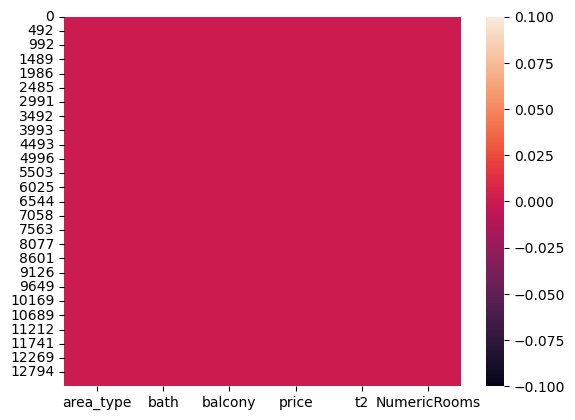

In [44]:
sns.heatmap(df.isnull())

# Dependent Vaiable i.e., PRICE

In [45]:
df.price.describe()

count    12529.000000
mean       114.295525
std        152.254954
min          8.000000
25%         50.000000
50%         73.000000
75%        120.000000
max       3600.000000
Name: price, dtype: float64

<AxesSubplot:xlabel='price', ylabel='Density'>

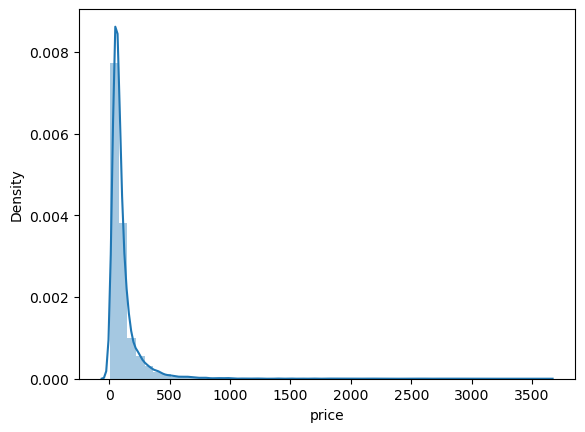

In [46]:
sns.distplot(df.price)

In [47]:
df['price']=np.log(df.price)

<AxesSubplot:xlabel='price', ylabel='Density'>

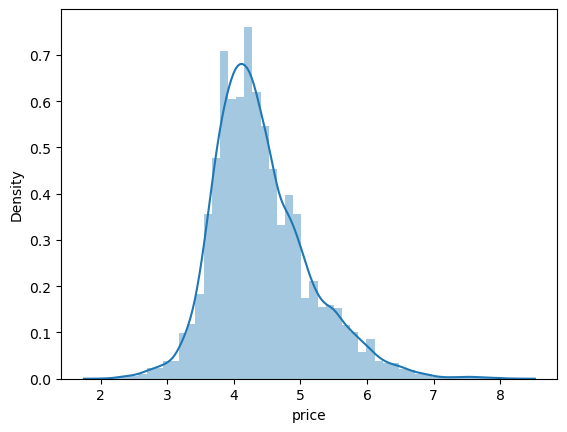

In [48]:
sns.distplot(df.price)

<AxesSubplot:xlabel='price'>

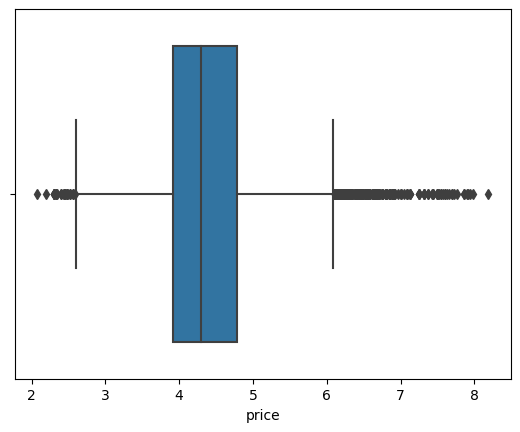

In [49]:
sns.boxplot(df.price)

In [50]:
df.columns

Index(['area_type', 'bath', 'balcony', 'price', 't2', 'NumericRooms'], dtype='object')

# area type

In [51]:
df['area_type'].describe()

count                    12529
unique                       4
top       Super built-up  Area
freq                      8126
Name: area_type, dtype: object

In [52]:
df['area_type'].value_counts()

Super built-up  Area    8126
Built-up  Area          2367
Plot  Area              1955
Carpet  Area              81
Name: area_type, dtype: int64

<AxesSubplot:xlabel='area_type', ylabel='count'>

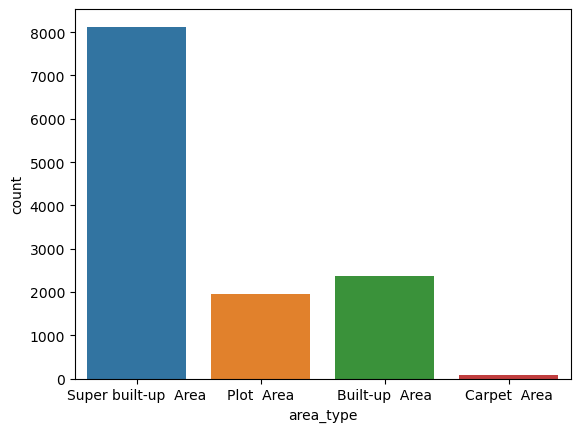

In [53]:
sns.countplot(x=df['area_type'])

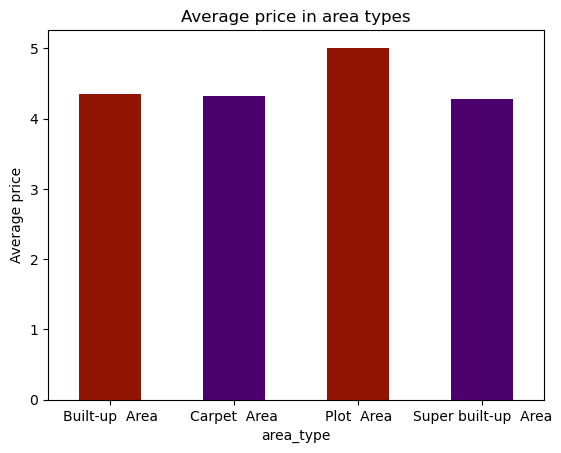

In [54]:
df.groupby('area_type')['price'].mean().plot(kind='bar',color=['#8f1402','#4b006e'])
plt.ylabel('Average price')
plt.xticks(rotation=0)
plt.title('Average price in area types')
plt.show()

In [55]:
df.groupby('area_type')['price'].mean()

area_type
Built-up  Area          4.344391
Carpet  Area            4.324628
Plot  Area              5.010020
Super built-up  Area    4.282601
Name: price, dtype: float64

In [56]:
# Statistical test

# t-test
from scipy.stats import ttest_ind,ttest_1samp
# Anova test
import statsmodels.api as sm
from statsmodels.formula.api import ols
# Tukey HSD
from statsmodels.stats.multicomp import pairwise_tukeyhsd
# chi-square
from scipy.stats import (chi2,chi2_contingency)
import statsmodels.formula.api as smf

In [57]:
model_area = ols('price ~ area_type',data = df).fit()
anova_area= sm.stats.anova_lm(model_area)
anova_area

,df,sum_sq,mean_sq,F,PR(>F)
area_type,3.0,846.46639,282.155463,619.577525,0.0
Residual,12525.0,5703.88214,0.455400,NaN,NaN


#### Since pvalue less than 0.05, area_type is a good predictor

In [58]:
df.bath.describe()

count    12529.000000
mean         2.708357
std          1.352483
min          1.000000
25%          2.000000
50%          2.000000
75%          3.000000
max         40.000000
Name: bath, dtype: float64

In [59]:
df.bath.value_counts()

2.0     6484
3.0     3148
4.0     1181
1.0      715
5.0      507
6.0      256
7.0      101
8.0       64
9.0       40
10.0      13
12.0       7
13.0       3
11.0       3
16.0       2
27.0       1
40.0       1
15.0       1
14.0       1
18.0       1
Name: bath, dtype: int64

<AxesSubplot:xlabel='bath', ylabel='count'>

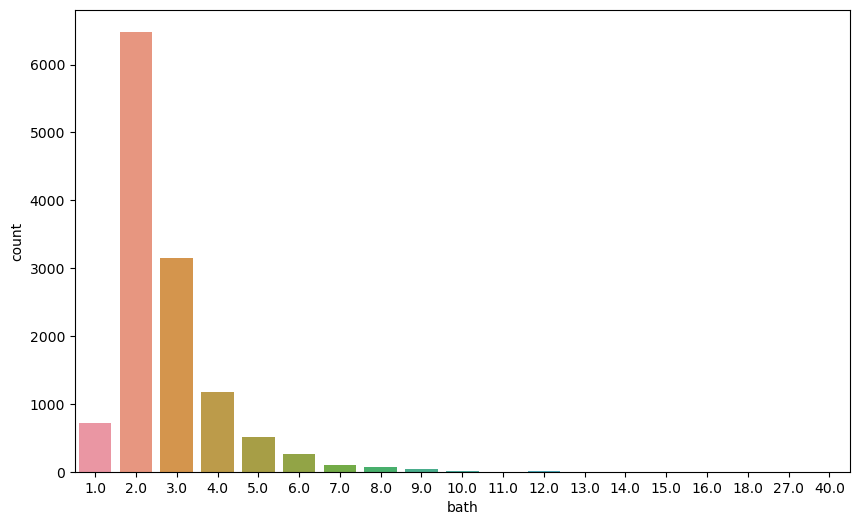

In [60]:
plt.figure(figsize=(10,6))
sns.countplot(x=df.bath)

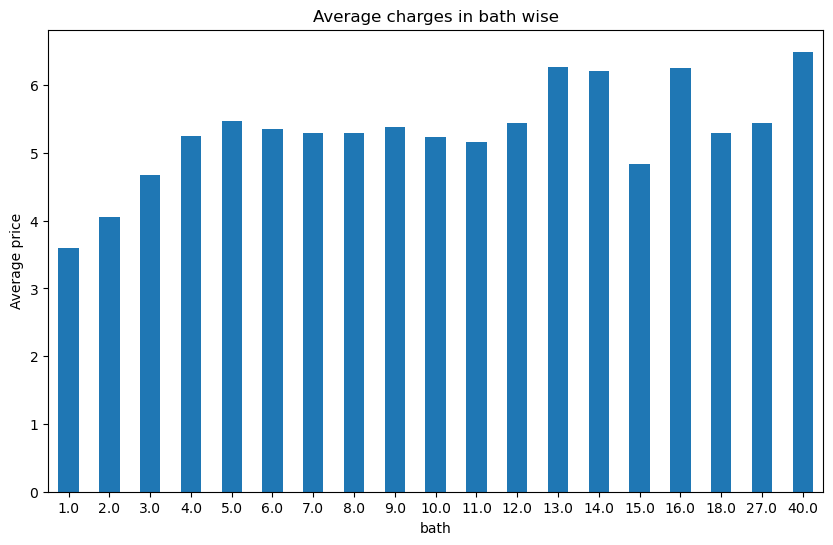

In [61]:
plt.figure(figsize=(10,6))
df.groupby('bath')['price'].mean().plot(kind='bar')
plt.ylabel('Average price')
plt.xticks(rotation=0)
plt.title('Average charges in bath wise')
plt.show()

In [62]:
model_bath = ols('price ~ bath',data = df).fit()
anova_bath = sm.stats.anova_lm(model_bath)
anova_bath

,df,sum_sq,mean_sq,F,PR(>F)
bath,1.0,2443.050252,2443.050252,7451.148766,0.0
Residual,12527.0,4107.298279,0.327876,NaN,NaN


In [63]:
df.columns

Index(['area_type', 'bath', 'balcony', 'price', 't2', 'NumericRooms'], dtype='object')

In [64]:
model_bal = ols('price ~ balcony',data = df).fit()
anova_bal = sm.stats.anova_lm(model_bal)
anova_bal

,df,sum_sq,mean_sq,F,PR(>F)
balcony,1.0,275.274569,275.274569,549.533686,5.675557e-119
Residual,12527.0,6275.073962,0.500924,NaN,NaN


In [65]:
np.corrcoef(df.t2,df.price)

array([[1.       , 0.5520083],
       [0.5520083, 1.       ]])

In [66]:
model_bed = ols('price ~ NumericRooms',data = df).fit()
anova_bed = sm.stats.anova_lm(model_bed)
anova_bed

,df,sum_sq,mean_sq,F,PR(>F)
NumericRooms,18.0,3091.046052,171.724781,621.014502,0.0
Residual,12510.0,3459.302479,0.276523,NaN,NaN


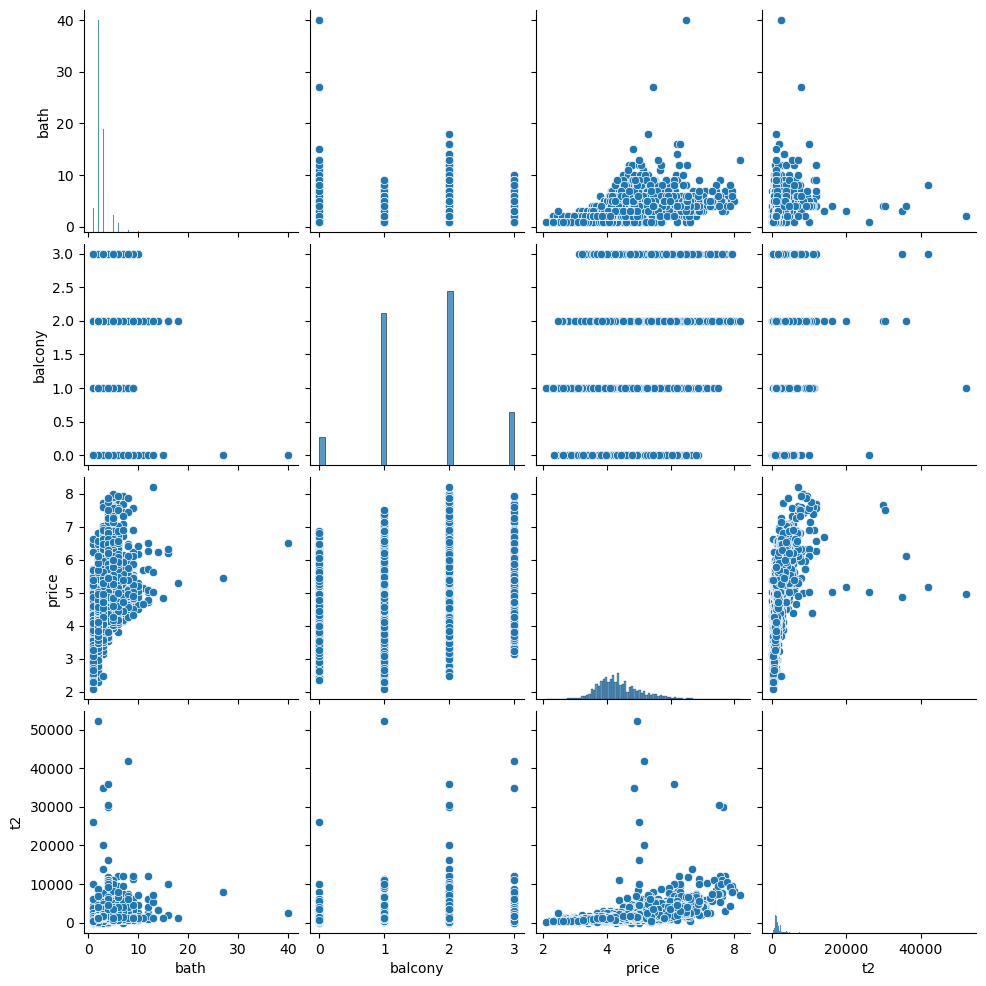

In [67]:
sns.pairplot(data=df)

In [68]:
df.bath= df.bath.astype('float')
df.balcony=df.balcony.astype('float')
df.dtypes

area_type        object
bath            float64
balcony         float64
price           float64
t2              float64
NumericRooms     object
dtype: object

In [69]:
x1=df.drop('price',axis=1)
x = pd.get_dummies(x1,drop_first=True)
x

,bath,balcony,t2,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area,NumericRooms_10,NumericRooms_11,NumericRooms_12,NumericRooms_13,...,NumericRooms_2,NumericRooms_27,NumericRooms_3,NumericRooms_4,NumericRooms_43,NumericRooms_5,NumericRooms_6,NumericRooms_7,NumericRooms_8,NumericRooms_9
0,2.0,1.0,1056.0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,5.0,3.0,2600.0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,2.0,3.0,1440.0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,3.0,1.0,1521.0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,2.0,1.0,1200.0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13314,3.0,3.0,1715.0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
13315,4.0,0.0,3453.0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
13316,5.0,2.0,3600.0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
13317,2.0,1.0,1141.0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [70]:
y=df.price
y.head()

0    3.665355
1    4.787492
2    4.127134
3    4.553877
4    3.931826
Name: price, dtype: float64

In [71]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test,=train_test_split(x,y,test_size=0.20,random_state=2)  #train_size is 80%

In [72]:
from sklearn.preprocessing import StandardScaler

sc_x=StandardScaler()
x_train=sc_x.fit_transform(x_train)    #only for train we use fit
x_test=sc_x.transform(x_test) 

In [73]:
print('x_train =',x_train.shape)
print('x_test =',x_test.shape)
print('y_train =',y_train.shape)
print('y_test =',y_test.shape)

x_train = (10023, 24)
x_test = (2506, 24)
y_train = (10023,)
y_test = (2506,)


In [74]:
from sklearn.linear_model import LinearRegression

In [75]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)
train_pred=lr.predict(x_train)
test_pred=lr.predict(x_test)

#Now will check the MSE of the model
train_mse=mean_squared_error(y_train,train_pred)
test_mse=mean_squared_error(y_test,test_pred)
print('train_mse =',train_mse)
print('test_mse =',test_mse)

# Now will check the r2_score 
train_r2_score=r2_score(y_train,train_pred)
test_r2_score=r2_score(y_test,test_pred)
print('train_r2_score =',train_r2_score)
print('test_r2_score =',test_r2_score)

train_mse = 0.21205826865638508
test_mse = 0.20200747866679042


NameError: name 'r2_score' is not defined

In [ ]:
df.shape

In [ ]:
13320-12434

In [ ]:
(886/13320)*100

In [ ]:
df.columns

In [ ]:
x1=df.drop(['price','NumericRooms','area_type','bath'],axis=1)
x = pd.get_dummies(x1,drop_first=True)
x

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test,=train_test_split(x,y,test_size=0.20,random_state=2)  #train_size is 80%

In [ ]:
from sklearn.preprocessing import StandardScaler

sc_x=StandardScaler()
x_train=sc_x.fit_transform(x_train)    #only for train we use fit
x_test=sc_x.transform(x_test) 

In [ ]:
print('x_train =',x_train.shape)
print('x_test =',x_test.shape)
print('y_train =',y_train.shape)
print('y_test =',y_test.shape)

In [ ]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)
train_pred=lr.predict(x_train)
test_pred=lr.predict(x_test)

#Now will check the MSE of the model
train_mse=mean_squared_error(y_train,train_pred)
test_mse=mean_squared_error(y_test,test_pred)
print('train_mse =',train_mse)
print('test_mse =',test_mse)

# Now will check the r2_score 
train_r2_score=r2_score(y_train,train_pred)
test_r2_score=r2_score(y_test,test_pred)
print('train_r2_score =',train_r2_score)
print('test_r2_score =',test_r2_score)